In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Read in the CMPD data
crimeDF = pd.read_csv('CMPD_Incidents.csv', low_memory=False)
crimeDF.head()

,X,Y,YEAR,INCIDENT_REPORT_ID,LOCATION,CITY,STATE,ZIP,X_COORD_PUBLIC,Y_COORD_PUBLIC,...,PLACE_TYPE_DESCRIPTION,PLACE_DETAIL_DESCRIPTION,CLEARANCE_STATUS,CLEARANCE_DETAIL_STATUS,CLEARANCE_DATE,HIGHEST_NIBRS_CODE,HIGHEST_NIBRS_DESCRIPTION,OBJECTID,GlobalID,Shape
0,1.477687e+06,540313.999945,2023,20231024-2215-01,5700 SLOPING OAKS RD,CHARLOTTE,NC,28212,1477687.0,540314.0,...,Residential,Apartment/Duplex Private Res,Open,Open,NaN,240,Motor Vehicle Theft,1,{7CFED893-C66F-4E95-8A26-D84CFBD4516F},NaN
1,1.448674e+06,543094.999961,2023,20231024-2211-04,200 S POPLAR ST,CHARLOTTE,NC,28202,1448674.0,543095.0,...,Commercial Place,Other - Commercial Place,Open,Open,NaN,23H,All Other Thefts,2,{F0919628-BA54-40C6-8EF1-42C99F6ADEC4},NaN
2,1.471930e+06,479061.000076,2023,20231024-2151-01,20000 SHAFFER BACH LN,CHARLOTTE,NC,28277,1471930.0,479061.0,...,Residential,Private Residence,Open,Open,NaN,23H,All Other Thefts,3,{9D48B03F-EBC9-4498-B02F-742B5FABA547},NaN
3,1.409404e+06,500875.000083,2023,20231024-2130-02,13200 STEPHENDALE DR,CHARLOTTE,NC,28273,1409404.0,500875.0,...,Public/Non-Residential,Other - Public/Non-Residential,Open,Open,NaN,899,Other Unlisted Non-Criminal,4,{0D3A394C-3C4E-4405-8D59-1139A24C724C},NaN
4,NaN,NaN,2023,20231024-2108-04,8600 UNIVERSITY CITY,CHARLOTTE,NC,28262,NaN,NaN,...,Open Area,Other - Open Area,Open,Open,NaN,90Z,All Other Offenses,5,{9DE1E1AE-1783-4782-BB14-94E99CFD159D},NaN


In [3]:
# Unique IDs from the 'INCIDENT_REPORT_ID' column
unique_incident_report_ids = crimeDF['INCIDENT_REPORT_ID'].unique()
len(unique_incident_report_ids)

625556

In [4]:
addressDescription = crimeDF['ADDRESS_DESCRIPTION'].unique()
len(addressDescription)

3

In [5]:
yearlyCount = crimeDF['YEAR'].unique()
len(yearlyCount)

7

In [8]:
typeReclass = {'CITY':
{
     '110':'Charlotte', '1640_DEWBERRY_TER':'Charlotte', '28205':'Charlotte',
    '28210':'Charlotte', '28226':'Charlotte', '28262':'Charlotte', '28273':'Charlotte',
    '28277':'Charlotte', 'BALLANTYNE':'Charlotte', 'C':'Charlotte', 'CHAAROTTE':'Charlotte',
    'CHARLOLTTE':'Charlotte', 'CHARLOOTE':'Charlotte', 'CHARLOT9476TE':'Charlotte',
    'CHARLOTE':'Charlotte', 'CHARLOTT':'Charlotte', 'CHARLOTT3215E':'Charlotte', 'CHARLOTTE':'Charlotte',
    'CHARLOTTE_NC':'Charlotte', 'CHARLOTTE':'Charlotte', 
    'CHARLOTTE,_NC_28206':'Charlotte', 'CHARLOTTE,_NC_28209':'Charlotte', 'CHARLOTTE,_NC_28211':'Charlotte',
    'CHARLOTTE/NC/28269':'Charlotte', 'CHARLOTTEE':'Charlotte', 'CHARLOTTEJAVASCRIPT:VOID_PT_SU':'Charlotte',
    'CHARLOTTLE':'Charlotte', 'CHARLOTTTE':'Charlotte', 'CHARLTOTE':'Charlotte', 'CHAROLETTE':'Charlotte',
    'CHAROLTTE':'Charlotte', 'CHRALOTTE':'Charlotte', 'CHRLOTTE':'Charlotte', 'CONCORD':'OTHER', 
    'CORNELIUS':'Charlotte', 'DAIVDSON':'OTHER', 'FORT_MILL':'OTHER', 'H':'OTHER', 'HUMTERSVILLE':'OTHER',
    'HUNTERSVILLE':'OTHER', 'HUNTERVILLE':'OTHER', 'MATHEWS':'OTHER', 'MATTHES':'OTHER', 'MATTHEWS':'OTHER',
    'MECKLENBERG':'OTHER', 'MECKLENBRUG':'OTHER', 'MECKLENBURG':'OTHER', 'MIDLAND':'OTHER', 'MINT_HIL':'OTHER',
    'MINT_HILL':'OTHER', 'MINTHILL':'OTHER', 'MOUNT_HOLLY':'OTHER', 'OTHER/NOT_LISTED':'OTHER',
    'PINEVILLE':'OTHER', 'PINEVLE':'OTHER', 'RT_SIDE':'OTHER', 'UNKNOWN/REFUSED':'OTHER'}}
    
        

In [23]:
#incorporate dictionary

crimeDF['Reclassified_type'] = crimeDF['CITY'].map(typeReclass['CITY'])
columns_to_delete = ['OTHER']
#change data format
date_format = "%Y/%m/%d %H:%M:%S%z"
# filter to data format
crimeDF['DATE_INCIDENT_BEGAN'] = pd.to_datetime(crimeDF['DATE_INCIDENT_BEGAN'], format=date_format, errors='coerce')
#set time stamp to 2017-2022 end of year
startDate = pd.Timestamp("2017-01-01", tz='UTC')
endDate = pd.Timestamp("2022-12-31 23:59:59", tz='UTC')
# filter from 2017 to 2022
crimeDF = crimeDF[(crimeDF['DATE_INCIDENT_BEGAN'] >= startDate) & (crimeDF['DATE_INCIDENT_BEGAN'] <= endDate)]

#get the annual years 
crimeDF['Year'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('Y')

# group the year and city and get total count
crimesPerYear = crimeDF.groupby(['Reclassified_type', 'Year']).size().reset_index(name='Crime Count')

reclassifiedAnnualCrimeTable = crimesPerYear.pivot(index='Year', columns='Reclassified_type', values='Crime Count').fillna(0)
reclassifiedAnnualCrimeTable.drop(columns = columns_to_delete, inplace=True)
pd.set_option('display.max_rows', 70)
reclassifiedAnnualCrimeTable


C:\Users\KYNKE\AppData\Local\Temp\ipykernel_11876\2521029533.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  crimeDF['Year'] = crimeDF['DATE_INCIDENT_BEGAN'].dt.to_period('Y')


Reclassified_type,Charlotte
Year,
2017,92941
2018,91176
2019,94941
2020,86501
2021,87761
2022,91780


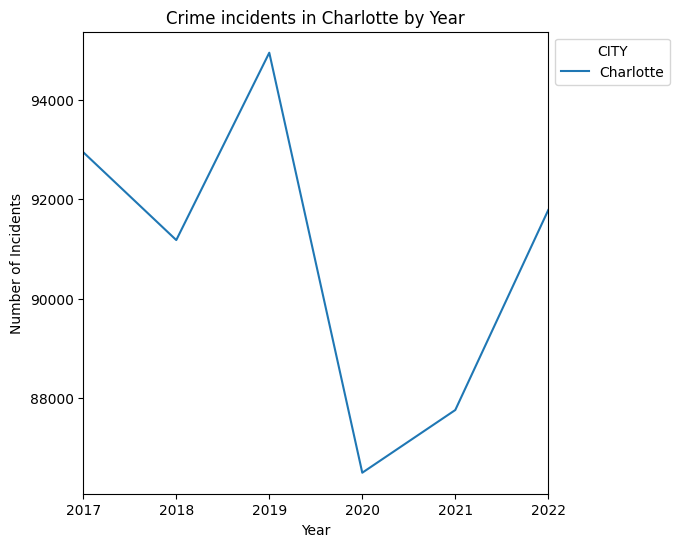

In [25]:

# get date format

yearly_data = reclassifiedAnnualCrimeTable

    
# create a bar chart for the all years
ax = yearly_data.plot(kind='line', stacked=True, figsize=(6, 6), title=f'Crime incidents in Charlotte by Year')
    
    # chart table
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='CITY', loc='upper left', bbox_to_anchor=(1, 1))
    
    # show the chart
plt.show()